In [1]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Age: Assume a range between 18 and 80 years
age = np.random.randint(18, 80, num_samples)

# Gender: 0 for male, 1 for female
gender = np.random.choice([0, 1], num_samples)

# BMI (Body Mass Index): Assume a range between 18 and 35
bmi = np.random.uniform(18, 35, num_samples)

# Blood Pressure: Assume a systolic range between 90 and 160, and diastolic range between 60 and 100
systolic_bp = np.random.randint(90, 160, num_samples)
diastolic_bp = np.random.randint(60, 100, num_samples)

# Cholesterol Levels: Assume a range between 120 and 240
cholesterol = np.random.randint(120, 240, num_samples)

# Family Medical History: 0 for no family history, 1 for positive family history
family_history = np.random.choice([0, 1], num_samples)

# Target variable: 0 for no disease, 1 for presence of disease
target = np.random.choice([0, 1], num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'BMI': bmi,
    'Systolic_BP': systolic_bp,
    'Diastolic_BP': diastolic_bp,
    'Cholesterol': cholesterol,
    'Family_History': family_history,
    'Target': target
})

# Save the synthetic dataset to a CSV file
data.to_csv('health_dataset.csv', index=False)


In [2]:
data.head()

,Age,Gender,BMI,Systolic_BP,Diastolic_BP,Cholesterol,Family_History,Target
0,56,0,20.048884,109,81,143,0,1
1,69,0,30.427402,104,63,237,1,1
2,46,1,21.274183,137,87,225,1,0
3,32,0,19.959794,110,71,192,1,1
4,60,0,25.169965,131,97,145,1,1


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the synthetic dataset
data = pd.read_csv('health_dataset.csv')

# Extract features and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Standardize features using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Alternatively, normalize features using Min-Max scaling
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)

# Replace the original features with the standardized features in the DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
data_standardized = pd.concat([X_standardized_df, y], axis=1)

# Save the standardized dataset to a new CSV file
data_standardized.to_csv('health_dataset_standardized.csv', index=False)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the standardized dataset
data_standardized = pd.read_csv('health_dataset_standardized.csv')

# Extract features and target variable
X = data_standardized.drop('Target', axis=1)
y = data_standardized['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
for model_name, metrics in results.items():
    print(f'\n{model_name} Results:')
    print(f'Accuracy: {metrics["Accuracy"]:.2f}')
    print(f'Precision: {metrics["Precision"]:.2f}')
    print(f'Recall: {metrics["Recall"]:.2f}')
    print(f'F1 Score: {metrics["F1 Score"]:.2f}')



Logistic Regression Results:
Accuracy: 0.45
Precision: 0.46
Recall: 0.58
F1 Score: 0.52

Decision Tree Results:
Accuracy: 0.49
Precision: 0.50
Recall: 0.53
F1 Score: 0.51

Random Forest Results:
Accuracy: 0.49
Precision: 0.50
Recall: 0.52
F1 Score: 0.51

Support Vector Machine Results:
Accuracy: 0.48
Precision: 0.49
Recall: 0.58
F1 Score: 0.53


In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Load the standardized dataset
data_standardized = pd.read_csv('health_dataset_standardized.csv')

# Extract features and target variable
X = data_standardized.drop('Target', axis=1)
y = data_standardized['Target']

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Perform k-fold cross-validation
k_folds = 5
cv_results = {}

for model_name, model in models.items():
    # Use StratifiedKFold for classification tasks to ensure class balance in each fold
    cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    # Calculate cross-validation scores
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Store results
    cv_results[model_name] = scores

# Display the cross-validation results
for model_name, scores in cv_results.items():
    print(f'\n{model_name} Cross-Validation Results:')
    print(f'Accuracy for each fold: {scores}')
    print(f'Mean Accuracy: {np.mean(scores):.2f}')
    print(f'Standard Deviation: {np.std(scores):.2f}')



Logistic Regression Cross-Validation Results:
Accuracy for each fold: [0.6   0.56  0.53  0.52  0.475]
Mean Accuracy: 0.54
Standard Deviation: 0.04

Decision Tree Cross-Validation Results:
Accuracy for each fold: [0.48  0.445 0.485 0.49  0.445]
Mean Accuracy: 0.47
Standard Deviation: 0.02

Random Forest Cross-Validation Results:
Accuracy for each fold: [0.48  0.53  0.52  0.54  0.475]
Mean Accuracy: 0.51
Standard Deviation: 0.03

Support Vector Machine Cross-Validation Results:
Accuracy for each fold: [0.565 0.555 0.46  0.5   0.505]
Mean Accuracy: 0.52
Standard Deviation: 0.04


In [6]:
from sklearn.model_selection import GridSearchCV

# Load the standardized dataset
data_standardized = pd.read_csv('health_dataset_standardized.csv')

# Extract features and target variable
X = data_standardized.drop('Target', axis=1)
y = data_standardized['Target']

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Display the best hyperparameters and corresponding accuracy
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.5399999999999999


In [7]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


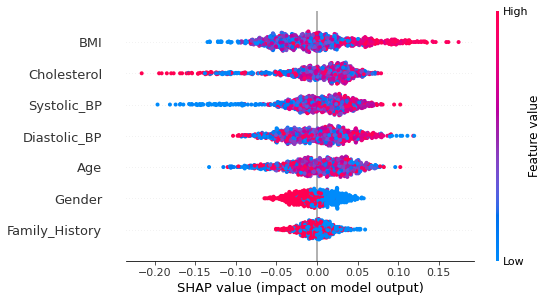

In [7]:
import shap

# Load the standardized dataset
data_standardized = pd.read_csv('health_dataset_standardized.csv')

# Extract features and target variable
X = data_standardized.drop('Target', axis=1)
y = data_standardized['Target']

# Train the random forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X, y)

# Use SHAP to explain predictions
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# Summary Plot: Feature Importance
shap.summary_plot(shap_values[1], X, feature_names=X.columns)

# Force Plot: Explanation for a single prediction
sample_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_index, :], X.iloc[sample_index, :])
